In [1]:
# import the libraries.
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

<AxesSubplot:>

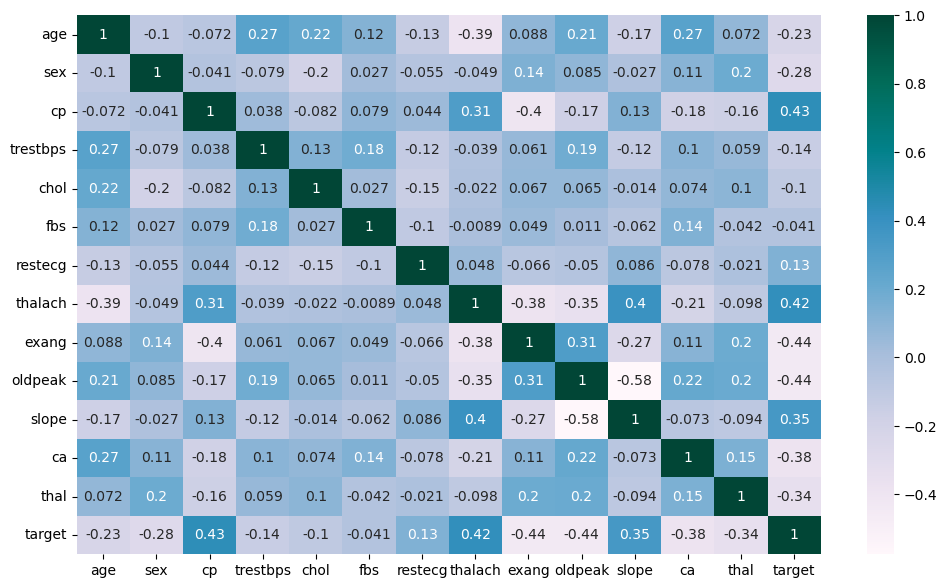

In [7]:
plt.figure(figsize=(12,7))
corr = df.corr()

sn.heatmap(corr, cmap="PuBuGn", annot=True)

In [8]:
df.shape

(1025, 14)

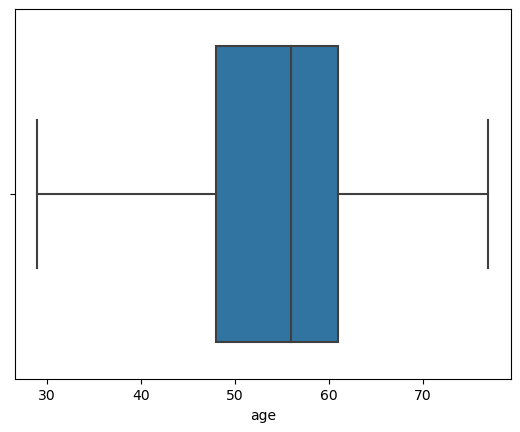

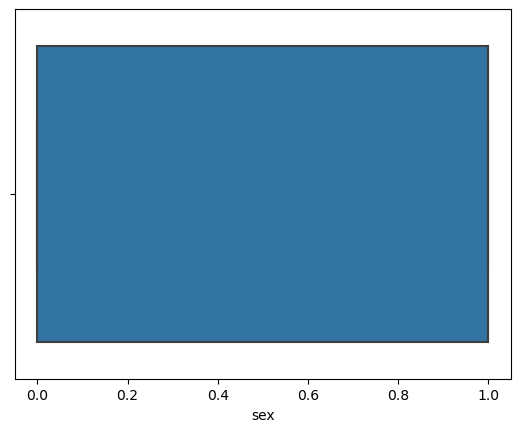

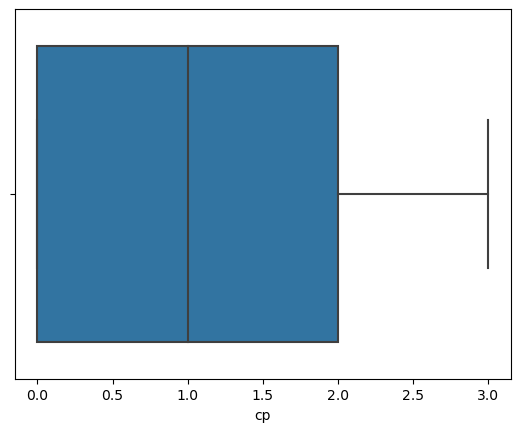

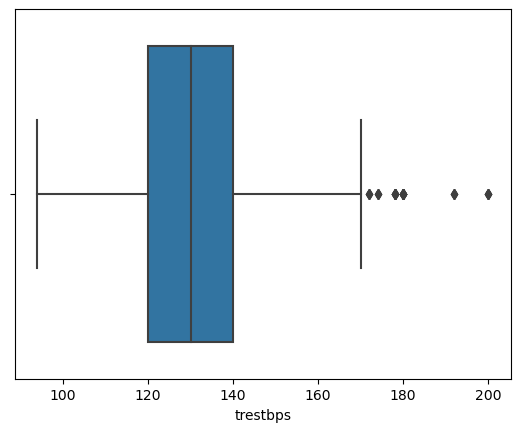

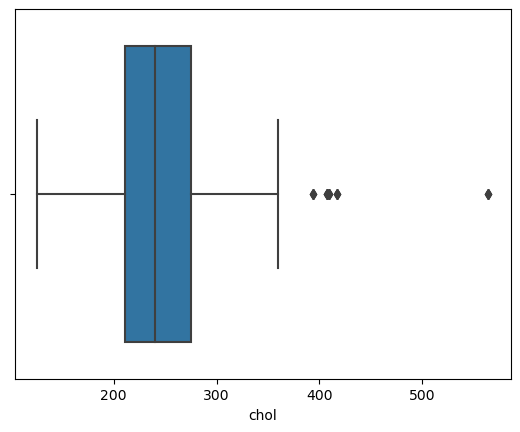

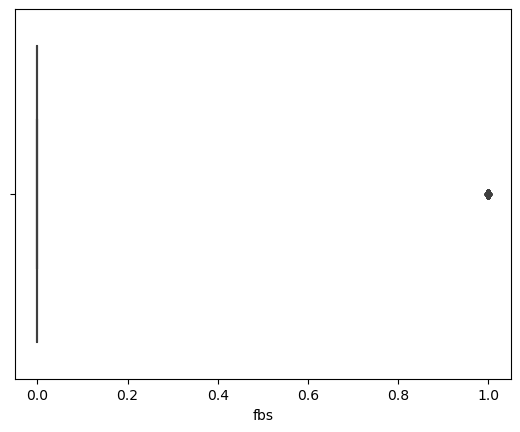

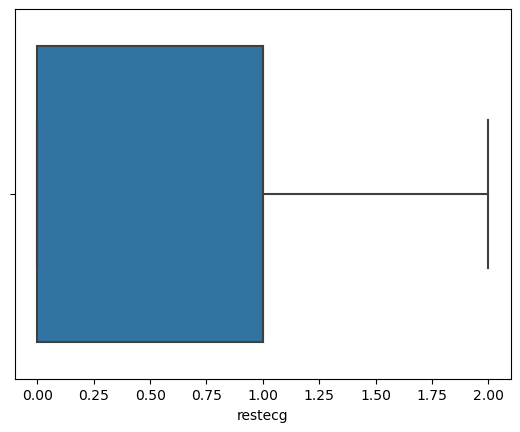

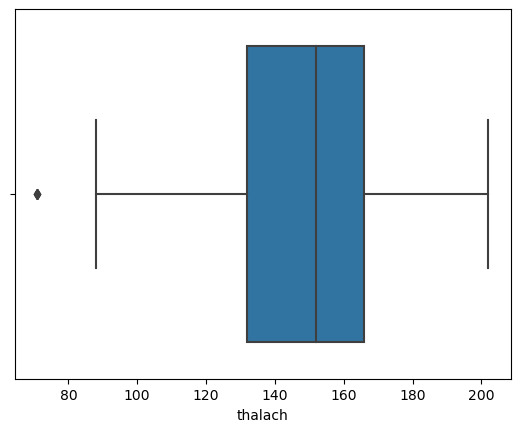

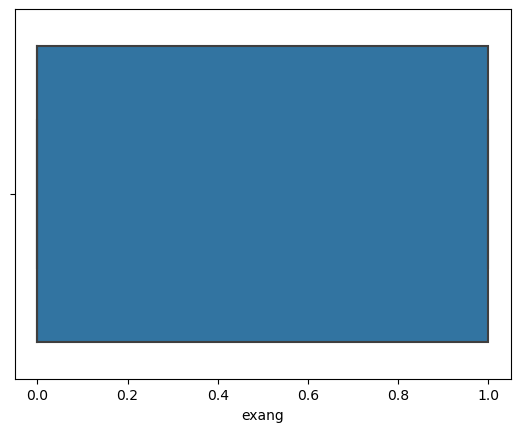

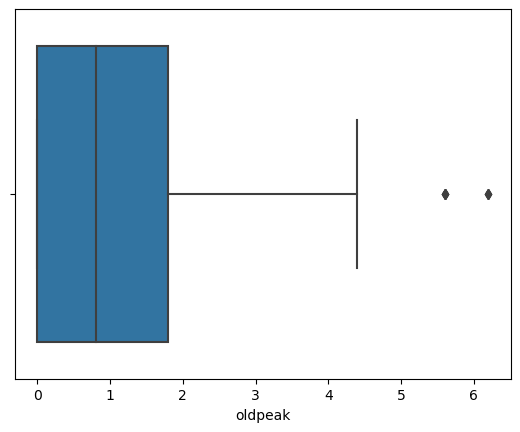

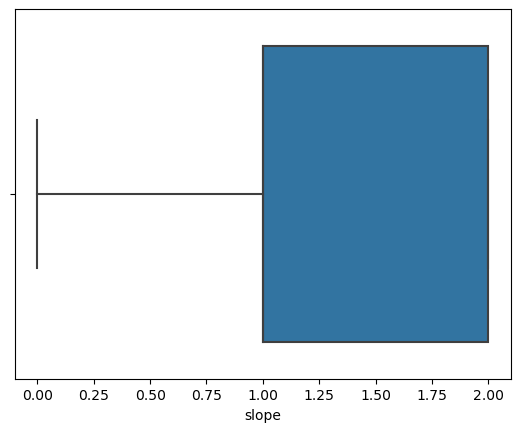

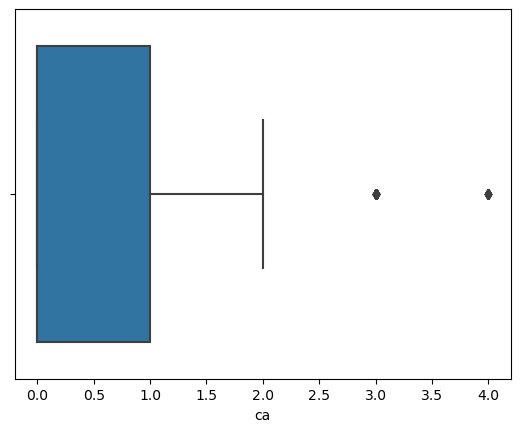

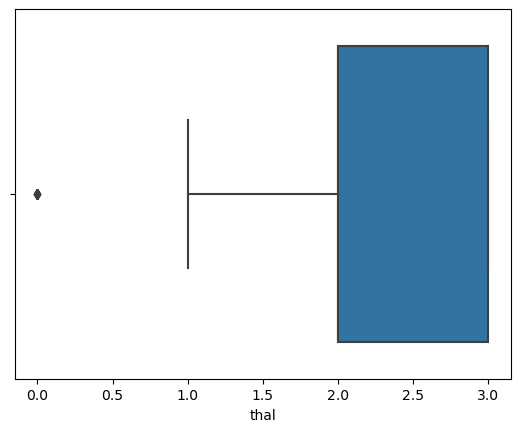

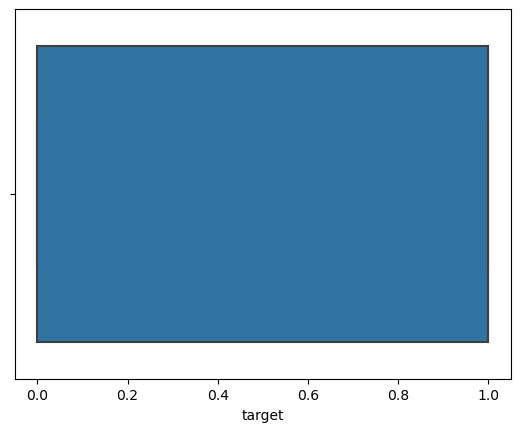

In [9]:
for i in df.columns:
    sn.boxplot(df[i])
    plt.show()

In [11]:
# removing outliers from the columns

for col in df.columns:
    
    if (df[col].dtype != 'object') and (col != 'age'):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        df[col]=np.where(df[col]  < Q1,Q1,df[col])
        df[col]=np.where(df[col]  > Q3,Q3,df[col])

In [12]:
x = df.drop(columns ='target', axis =1)
y = df['target']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 

In [14]:
# preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit_transform(x_train)
sc.transform(x_test)

array([[ 0.19265935, -1.58036735, -0.9860449 , ..., -0.93122903,
         1.18236767,  1.23837349],
       [ 1.40923601,  0.63276427,  1.20618516, ..., -0.93122903,
        -0.84576061,  1.23837349],
       [-0.02853641, -1.58036735,  1.20618516, ...,  1.07384969,
         1.18236767, -0.80751083],
       ...,
       [ 0.4138551 ,  0.63276427,  1.20618516, ..., -0.93122903,
        -0.84576061,  1.23837349],
       [ 1.07744237,  0.63276427, -0.9860449 , ..., -0.93122903,
         1.18236767, -0.80751083],
       [ 1.07744237,  0.63276427, -0.9860449 , ..., -0.93122903,
         1.18236767, -0.80751083]])

In [15]:
# training the model and check its accuracy 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred_test = rf.predict(x_test)
y_pred_train = rf.predict(x_train)

print("Accuracy with testing data :",accuracy_score(y_test,y_pred_test))
print("Accuracy with training data :",accuracy_score(y_train,y_pred_train))

Accuracy with testing data : 0.9707792207792207
Accuracy with training data : 1.0


In [16]:
# selecting important features based on their importance 
feature_scores = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

ca          0.131146
thal        0.125102
cp          0.124197
oldpeak     0.111122
thalach     0.105041
age         0.101358
exang       0.072955
chol        0.071227
slope       0.050712
trestbps    0.042986
sex         0.037108
restecg     0.027046
fbs         0.000000
dtype: float64

In [17]:
x=df[['cp', 'thalach', 'oldpeak', 'age', 'ca', 'thal', 'chol', 'exang']]
y = df['target']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 

sc = StandardScaler()

sc.fit_transform(x_train)
sc.transform(x_test)

array([[-0.98079119, -0.47488212,  1.33292502, ..., -0.81223286,
        -1.21472061,  1.45512587],
       [ 1.23409789, -1.21491795,  1.33292502, ..., -0.81223286,
        -0.94289919, -0.68722577],
       [-0.98079119,  0.7091752 ,  1.33292502, ..., -0.81223286,
         0.99868242, -0.68722577],
       ...,
       [ 1.23409789,  1.15319669,  1.33292502, ...,  1.23117402,
        -0.43808797,  1.45512587],
       [ 0.12665335,  0.41316087, -1.10648653, ...,  1.23117402,
         1.27050385, -0.68722577],
       [ 1.23409789, -0.62288929, -0.29334935, ..., -0.81223286,
         0.53270284,  1.45512587]])

In [19]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred_test = rf.predict(x_test)
y_pred_train = rf.predict(x_train)

print("Accuracy with testing data :",accuracy_score(y_test,y_pred_test))
print("Accuracy with training data :",accuracy_score(y_train,y_pred_train))

Accuracy with testing data : 0.9902597402597403
Accuracy with training data : 1.0


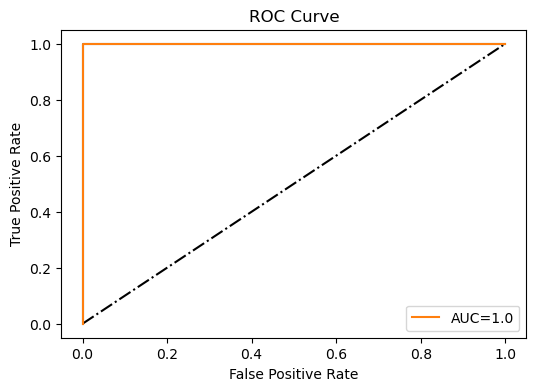

In [20]:
from sklearn.metrics import *
predicted_probs = rf.predict_proba(x_test)[:, 1] 

plt.figure(figsize=(6,4))
# Step 2: Obtain actual labels
actual_labels = y_test 

# Step 3: Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probs)

# Step 4: Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k-.')  # Plotting the random curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Step 5: Calculate AUC
auc = roc_auc_score(actual_labels, predicted_probs)

# Step 6: Add AUC value to the plot
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# converting model into pkl file
import pickle

# Assuming you have a trained model called 'model'
model = rf  # Your trained model

# Save the model to a file
with open('heart_disease_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# converting scaler object into pkl file

# Assuming you have a scaler object called 'sc'
model = sc  # Your scaler object

# Save the scaler to a file
with open('feature_scaler.pkl', 'wb') as f:
    pickle.dump(model, f)